# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp


# Reading from the preprocessed dataset

In [2]:
df=pd.read_csv('DF_F.csv')
df.drop(columns="Unnamed: 0",inplace=True)

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,21,30,2,3,30,2,3,59,7,2,0
1,7,32,70,2,4,68,2,4,134,7,2,0
2,7,15,1,2,2,0,2,2,0,7,2,0
3,7,33,77,2,7,73,2,7,144,7,2,0
4,7,55,78,3,7,74,3,7,146,8,2,0
5,7,66,34,4,3,32,4,3,64,9,2,0
6,7,43,32,3,3,31,3,3,61,8,2,0
7,7,78,79,4,7,75,4,7,149,9,2,0
8,7,61,4,4,2,2,4,2,5,9,2,0
9,7,37,2,3,2,1,3,2,2,8,2,0


# Spliting the dataset as training and testing data [80% training and 20% testing]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
feature=df.iloc[:,0].values
label=df.iloc[:,1:].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(label,feature,test_size=0.20,random_state=1)

# 1) Logistic Regresssion 

Five-fold cross-validation

Training the model

In [7]:
start = time.time()
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=label, y=feature, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
end = time.time()
print(end-start)

150.03465795516968


In [8]:
time_l_lr=end-start
train_mean_lr=np.mean(train_scores,axis=1)
test_mean_lr=np.mean(test_scores,axis=1)

In [9]:
train_std_lr=np.std(train_scores,axis=1)
test_std_lr=np.std(test_scores,axis=1)

In [10]:
from prettytable import PrettyTable


In [11]:
x = PrettyTable()
x.field_names = ['train_sizes','train_mean_lr','test_mean_lr','train_std_lr','test_std_lr']

for i1,i2,i3,i4,i5 in zip(train_sizes,train_mean_lr,test_mean_lr,train_std_lr,test_std_lr):
    x.add_row([i1,i2,i3,i4,i5])
print(x)

+-------------+--------------------+--------------------+------------------------+----------------------+
| train_sizes |   train_mean_lr    |    test_mean_lr    |      train_std_lr      |     test_std_lr      |
+-------------+--------------------+--------------------+------------------------+----------------------+
|    57270    | 0.9864361795006111 | 0.9551210272447198 | 0.00012850266801448974 | 0.018064472681386185 |
|    114540   | 0.986425702811245  | 0.9494077960341203 | 0.0015382410038534613  | 0.01981577288756088  |
|    171811   | 0.9861522254104802 | 0.9769403431542752 |  0.003102828926474626  | 0.006981700461387731 |
|    229081   | 0.986065190915004  | 0.9835559715568669 |  0.001968516996172518  | 0.008648604382437076 |
|    286352   | 0.9881313907358775 | 0.9873052029594792 | 0.0015072005710996823  | 0.007447182644155742 |
+-------------+--------------------+--------------------+------------------------+----------------------+


In [12]:
print('mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :')
print(np.mean(train_mean_lr))
print(np.mean(train_std_lr))
print(np.mean(test_mean_lr))
print(np.mean(test_std_lr))


mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :
0.9866421378746436
0.0016490580331229552
0.9704660681898923
0.012191546611385523


Learning curve for LR

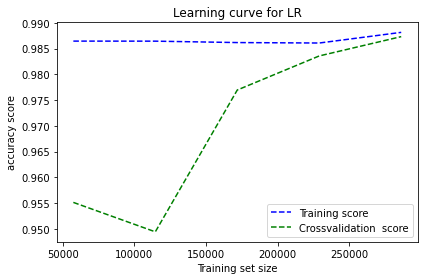

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean_lr,'--',color="b",label="Training score")
plt.plot(train_sizes,test_mean_lr,'--',color="g",label="Crossvalidation  score")
plt.title('Learning curve for LR')
plt.xlabel('Training set size'),plt.ylabel("accuracy score"),plt.legend(loc='best')
plt.tight_layout()
plt.show()

Testing and evaluation

In [14]:
start=time.time()
pipe_lr=pipe_lr.fit(x_train, y_train)
y_pred_train=pipe_lr.predict(x_train)
y_pred_test=pipe_lr.predict(x_test)
end=time.time()
print(end-start)
time_fit_lr=end-start

38.49999380111694


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy

In [15]:
lr_acc_train=accuracy_score(y_train, y_pred_train)

In [16]:
lr_acc_test=accuracy_score(y_test, y_pred_test)

In [17]:
print('Training accuracy - Logistic Regression :', lr_acc_train)

Training accuracy - Logistic Regression : 0.9876899759736268


In [18]:
print('Testing accuracy - Logistic Regression :', lr_acc_test)

Testing accuracy - Logistic Regression : 0.9874701420609312


Classification_Report

Training classification report

In [19]:
target_names = ['Normal','DoSattack','scan','malitiousControl','malitiousOperation','spying','dataProbing', 'wrongSetUp']
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       0.69      0.29      0.41       279
              scan       0.97      0.92      0.95       720
  malitiousControl       0.80      0.48      0.60       650
malitiousOperation       0.90      0.50      0.64      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.91      1.00      0.95        94
        wrongSetUp       0.99      1.00      0.99    278353

          accuracy                           0.99    286352
         macro avg       0.78      0.60      0.67    286352
      weighted avg       0.99      0.99      0.99    286352



Testing Classification Report

In [20]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.95      0.66      0.78      1178
         DoSattack       0.70      0.30      0.42        63
              scan       0.97      0.92      0.94       169
  malitiousControl       0.81      0.50      0.62       155
malitiousOperation       0.88      0.47      0.61       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.93      1.00      0.97        28
        wrongSetUp       0.99      1.00      0.99     69571

          accuracy                           0.99     71589
         macro avg       0.78      0.61      0.67     71589
      weighted avg       0.99      0.99      0.99     71589



Confusion matrix

In [21]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)

[[  775     0     0     0     0     0     0   403]
 [    0    19     0     0     0     0     0    44]
 [    0     0   155     0     0     0     0    14]
 [    0     0     0    78     0     0     0    77]
 [    5     0     5     0   143     0     2   150]
 [    0     0     0     0    16     0     0   104]
 [    0     0     0     0     0     0    28     0]
 [   33     8     0    18     3    15     0 69494]]


# 2) Decision Tree

Five-fold cross-validation

Training the model

In [22]:
start = time.time()
pipe_dt = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(estimator=pipe_dt,X=label, y=feature, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
end = time.time()
print(end-start)

12.217243671417236


In [23]:
time_l_dt = end-start
train_mean_dt = np.mean(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)

In [24]:
train_std_dt = np.std(train_scores_dt, axis=1)
test_std_dt = np.std(test_scores_dt, axis=1)

In [25]:

x = PrettyTable()
x.field_names = ['train_sizes','train_mean_dt','test_mean_dt','train_std_dt','test_std_dt']

for i1,i2,i3,i4,i5 in zip(train_sizes_dt,train_mean_dt,test_mean_dt,train_std_dt,test_std_dt):
    x.add_row([i1,i2,i3,i4,i5])
print(x)

+-------------+--------------------+--------------------+-----------------------+----------------------+
| train_sizes |   train_mean_dt    |    test_mean_dt    |      train_std_dt     |     test_std_dt      |
+-------------+--------------------+--------------------+-----------------------+----------------------+
|    57270    | 0.9947337174786102 | 0.966776592037791  | 0.0010384672445031108 | 0.013867345542824438 |
|    114540   | 0.9937646237122403 | 0.974275055428391  | 0.0010535513804165093 | 0.00818803387507006  |
|    171811   | 0.9937757186676057 | 0.9777253813665079 | 0.0009204370076839512 | 0.008151835637861843 |
|    229081   | 0.9942928483811404 | 0.9854640990053722 | 0.0012113681336286004 | 0.008493537465844268 |
|    286352   | 0.9946974353243562 | 0.990135271032911  | 0.0015379136519052747 | 0.005099482031819655 |
+-------------+--------------------+--------------------+-----------------------+----------------------+


In [26]:
print('mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :')
print(np.mean(train_mean_dt))
print(np.mean(train_std_dt))
print(np.mean(test_mean_dt))
print(np.mean(test_std_dt))


mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :
0.9942528687127906
0.0011523474836274891
0.9788752797741946
0.008760046910684053


Learning curve for DT

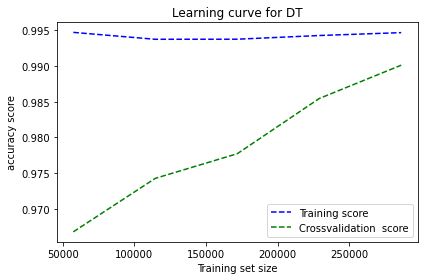

In [27]:
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean_dt,'--',color="b",label="Training score")
plt.plot(train_sizes,test_mean_dt,'--',color="g",label="Crossvalidation  score")
plt.title('Learning curve for DT')
plt.xlabel('Training set size'),plt.ylabel("accuracy score"),plt.legend(loc='best')
plt.tight_layout()
plt.show()

Testing and evaluation

In [28]:
start = time.time()
pipe_dt = pipe_dt.fit(x_train, y_train)
y_pred_train = pipe_dt.predict(x_train)
y_pred_test = pipe_dt.predict(x_test)
end = time.time()
print(end-start)
time_fit_dt = end - start

2.122478485107422


Accuracy

In [29]:
dt_acc_train=accuracy_score(y_train, y_pred_train)

In [30]:
print('Training accuracy - Decision Tree :', dt_acc_train)

Training accuracy - Decision Tree : 0.9944229479801084


In [31]:
dt_acc_test=accuracy_score(y_test, y_pred_test)

In [32]:
print('Testing accuracy - Decision Tree :', dt_acc_test)

Testing accuracy - Decision Tree : 0.9943566749081563


Classification_Report

Training Classification_Report

In [33]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       1.00      0.65      0.79      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



Testing Classification_Report

In [34]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       1.00      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.99      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



Confusion Matrix

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [    0,     0,     0,     0,     0,     1,     0, 69570]],
      dtype=int64)

# 3) Random Forest

Five-fold cross-validation

Training the model

In [36]:
start=time.time()
pipe_rf = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(estimator=pipe_rf,X=label, y=feature, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
end=time.time()
print(end-start)


31.969480276107788


In [37]:
time_l_rf = end-start
train_mean_rf= np.mean(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)

In [38]:
train_std_rf = np.std(train_scores_rf, axis=1)
test_std_rf = np.std(test_scores_rf, axis=1)

In [39]:

x = PrettyTable()
x.field_names = ['train_sizes','train_mean_rf','test_mean_rf','train_std_rf','test_std_rf']

for i1,i2,i3,i4,i5 in zip(train_sizes_rf,train_mean_rf,test_mean_rf,train_std_rf,test_std_rf):
    x.add_row([i1,i2,i3,i4,i5])
print(x)

+-------------+--------------------+--------------------+-----------------------+----------------------+
| train_sizes |   train_mean_rf    |    test_mean_rf    |      train_std_rf     |     test_std_rf      |
+-------------+--------------------+--------------------+-----------------------+----------------------+
|    57270    | 0.9947337174786102 | 0.9735989644243996 | 0.0010384672445031108 | 0.00833789809568867  |
|    114540   | 0.9937646237122403 | 0.9710985453597519 | 0.0010535513804165093 | 0.010937053367842207 |
|    171811   | 0.9937757186676057 | 0.9774627674035367 | 0.0009204370076839512 | 0.008403979732352001 |
|    229081   | 0.9942928483811404 | 0.985112084818374  | 0.0012113681336286004 | 0.008866902336569381 |
|    286352   | 0.9946953400011175 | 0.989881038284844  | 0.0015381109351161573 | 0.004907474507821542 |
+-------------+--------------------+--------------------+-----------------------+----------------------+


In [40]:
print('mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :')
print(np.mean(train_mean_rf))
print(np.mean(train_std_rf))
print(np.mean(test_mean_rf))
print(np.mean(test_std_rf))


mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :
0.9942524496481427
0.0011523869402696655
0.9794306800581813
0.00829066160805476


Learning curve for RF

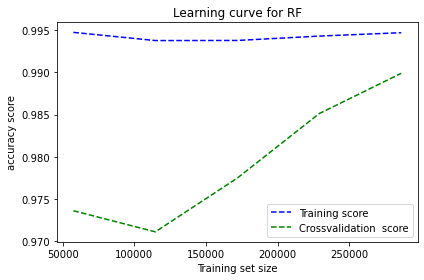

In [41]:

plt.plot(train_sizes,train_mean_rf,'--',color="b",label="Training score")
plt.plot(train_sizes,test_mean_rf,'--',color="g",label="Crossvalidation  score")
plt.title('Learning curve for RF')
plt.xlabel('Training set size'),plt.ylabel("accuracy score"),plt.legend(loc='best')
plt.tight_layout()
plt.show()

Testing and evaluation

In [42]:
start=time.time()
pipe_rf = pipe_rf.fit(x_train, y_train)
y_pred_train = pipe_rf.predict(x_train)
y_pred_test = pipe_rf.predict(x_test)
end = time.time()
print(end-start)
time_fit_rf = end-start


5.730687141418457


In [43]:
y_pred_train = pipe_rf.predict(x_train)
y_pred_test = pipe_rf.predict(x_test)

Accuracy

In [44]:
rf_acc_train=accuracy_score(y_train, y_pred_train)

In [45]:
print('Training accuracy - Random Forest :', rf_acc_train)

Training accuracy - Random Forest : 0.9944229479801084


In [46]:
rf_acc_test=accuracy_score(y_test, y_pred_test)

In [47]:
print('Testing accuracy - Random Forest :', rf_acc_test)

Testing accuracy - Random Forest : 0.9943427062816913


Classification_Report

Training Classification_Report

In [48]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       1.00      0.65      0.79      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



Testing Classification_Report

In [49]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       1.00      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       0.99      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



Confusion matrix

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)

[[  775     0     0     0     0     0     0   403]
 [    0    63     0     0     0     0     0     0]
 [    0     0   169     0     0     0     0     0]
 [    0     0     0   155     0     0     0     0]
 [    0     0     0     0   305     0     0     0]
 [    0     0     0     0     0   120     0     0]
 [    0     0     0     0     0     0    28     0]
 [    0     0     0     0     2     0     0 69569]]


# 4) Artificial neural network (ANN)

Five-fold cross-validation

Training the model

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [52]:
start = time.time()
pipe_ann = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_ann, train_scores_ann, test_scores_ann = learning_curve(estimator=pipe_ann,X=label, y=feature, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
end = time.time()
print(end-start)

97.87621355056763


In [53]:
time_l_ann = end-start
train_mean_ann = np.mean(train_scores_ann, axis=1)
test_mean_ann = np.mean(test_scores_ann, axis=1)

In [54]:
train_std_ann = np.std(train_scores_ann, axis=1)
test_std_ann = np.std(test_scores_ann, axis=1)

In [55]:

x = PrettyTable()
x.field_names = ['train_sizes','train_mean_ann','test_mean_ann','train_std_ann','test_std_ann']

for i1,i2,i3,i4,i5 in zip(train_sizes_ann,train_mean_ann,test_mean_ann,train_std_ann,test_std_ann):
    x.add_row([i1,i2,i3,i4,i5])
print(x)

+-------------+--------------------+--------------------+-----------------------+----------------------+
| train_sizes |   train_mean_ann   |   test_mean_ann    |     train_std_ann     |     test_std_ann     |
+-------------+--------------------+--------------------+-----------------------+----------------------+
|    57270    | 0.985353588266108  | 0.9528469025434829 |  0.002769349231984825 | 0.020532359545230076 |
|    114540   | 0.9879762528374367 | 0.9452255209766735 |  0.002352337574852267 | 0.02541313694281631  |
|    171811   | 0.9901286879187013 | 0.9763201178364824 | 0.0033929690035031457 | 0.010673125121859823 |
|    229081   | 0.9915165378185009 | 0.9846483197074287 |  0.00350279803299699  | 0.005058990467425109 |
|    286352   | 0.9943300553165335 | 0.9934989629206085 | 0.0017521499462828801 | 0.007563520706623487 |
+-------------+--------------------+--------------------+-----------------------+----------------------+


In [56]:
print('mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :')
print(np.mean(train_mean_ann))
print(np.mean(train_std_ann))
print(np.mean(test_mean_ann))
print(np.mean(test_std_ann))


mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :
0.9898610244314561
0.0027539207579240217
0.9705079647969352
0.01384822655679096


Learning curve for ANN

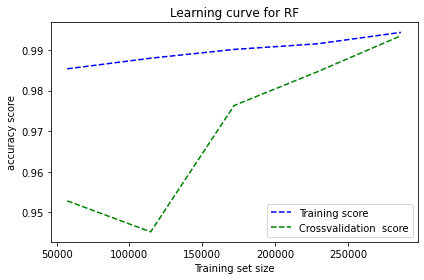

In [57]:

plt.plot(train_sizes,train_mean_ann,'--',color="b",label="Training score")
plt.plot(train_sizes,test_mean_ann,'--',color="g",label="Crossvalidation  score")
plt.title('Learning curve for RF')
plt.xlabel('Training set size'),plt.ylabel("accuracy score"),plt.legend(loc='best')
plt.tight_layout()
plt.show()

Testing and evaluation

In [58]:
start = time.time()
pipe_ann = pipe_ann.fit(x_train, y_train)
y_pred_train = pipe_ann.predict(x_train)
y_pred_test = pipe_ann.predict(x_test)
end = time.time()
print(end - start)
time_fit_ann = end-start

Iteration 1, loss = 0.05163256
Iteration 2, loss = 0.02227365
Iteration 3, loss = 0.01709014
Iteration 4, loss = 0.01532342
Iteration 5, loss = 0.01385408
Iteration 6, loss = 0.01350023
Iteration 7, loss = 0.01303035
Iteration 8, loss = 0.01266507
Iteration 9, loss = 0.01233092
Iteration 10, loss = 0.01223970


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


29.778282165527344


Accuracy

In [59]:

ann_acc_train=accuracy_score(y_train, y_pred_train)

In [60]:
print('Training accuracy - Artificial Neural Network :', ann_acc_train)

Training accuracy - Artificial Neural Network : 0.9943042129965916


In [61]:
ann_acc_test=accuracy_score(y_test, y_pred_test)

In [62]:
print('Testing accuracy - Artificial Neural Network :', ann_acc_test)

Testing accuracy - Artificial Neural Network : 0.9942588945229016


Classification_Report

Training Classification_Report

In [63]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.99      0.65      0.79      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      0.99      0.99      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



Testing Classification_Report

In [64]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       1.00      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       0.99      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      0.99      0.99       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



Confusion matrix

In [65]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)

[[  775     0     0     0     0     0     0   403]
 [    0    63     0     0     0     0     0     0]
 [    0     0   169     0     0     0     0     0]
 [    0     0     0   155     0     0     0     0]
 [    0     0     0     0   301     0     0     4]
 [    0     0     0     0     0   120     0     0]
 [    0     0     0     0     0     0    28     0]
 [    1     0     1     0     0     2     0 69567]]


# 5) Support vector machine (SVM)

Five-fold cross-validation

Training the model

In [66]:
start = time.time()
pipe_svm = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(estimator=pipe_svm,X=label, y=feature, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
end = time.time()
print(end-start)

346.04721236228943


In [67]:
time_l_svm = end-start
train_mean_svm = np.mean(train_scores_svm, axis=1)
test_mean_svm = np.mean(test_scores_svm, axis=1)

In [68]:
train_std_svm = np.std(train_scores_svm, axis=1)
test_std_svm = np.std(test_scores_svm, axis=1)

In [69]:

x = PrettyTable()
x.field_names = ['train_sizes','train_mean_svm','test_mean_svm','train_std_svm','test_std_svm']

for i1,i2,i3,i4,i5 in zip(train_sizes_svm,train_mean_svm,test_mean_svm,train_std_svm,test_std_svm):
    x.add_row([i1,i2,i3,i4,i5])
print(x)

+-------------+--------------------+--------------------+-----------------------+-----------------------+
| train_sizes |   train_mean_svm   |   test_mean_svm    |     train_std_svm     |      test_std_svm     |
+-------------+--------------------+--------------------+-----------------------+-----------------------+
|    57270    | 0.9829753797799894 | 0.9716266019384072 | 0.0027706172370032876 |  0.006805073063544585 |
|    114540   | 0.9816710319539025 | 0.9556630347324673 | 0.0034054057585487392 |  0.01812267073928982  |
|    171811   | 0.9853408687453074 | 0.9771191462560326 |  0.002951752849657848 | 0.0067727183738130105 |
|    229081   | 0.9822630423300055 | 0.9795357562155941 | 0.0030207900564154407 |  0.007600406921434045 |
|    286352   | 0.9831438229870928 | 0.9826256595123237 | 0.0017662018598379962 |  0.007245295366916275 |
+-------------+--------------------+--------------------+-----------------------+-----------------------+


In [70]:
print('mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :')
print(np.mean(train_mean_svm))
print(np.mean(train_std_svm))
print(np.mean(test_mean_svm))
print(np.mean(test_std_svm))

mean values of training_mean, training_standard_deviation, testing_mean, testing_standard_deviation are given below in respective order :
0.9830788291592594
0.0027829535522926625
0.9733140397309649
0.009309232892999546


Learning curve for SVM

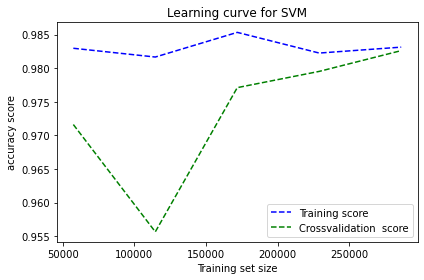

In [71]:

plt.plot(train_sizes,train_mean_svm,'--',color="b",label="Training score")
plt.plot(train_sizes,test_mean_svm,'--',color="g",label="Crossvalidation  score")
plt.title('Learning curve for SVM')
plt.xlabel('Training set size'),plt.ylabel("accuracy score"),plt.legend(loc='best')
plt.tight_layout()
plt.show()

Testing and evaluation

In [72]:
start = time.time()
pipe_svm = pipe_svm.fit(x_train, y_train)
y_pred_train = pipe_svm.predict(x_train)
y_pred_test = pipe_svm.predict(x_test)
end = time.time()
print(end-start)
time_fit_svm = end-start

103.49215841293335


Accuracy

In [73]:

svm_acc_train=accuracy_score(y_train, y_pred_train)

In [74]:
print('Training accuracy - Support vector machine :', svm_acc_train)

Training accuracy - Support vector machine : 0.9826821534335364


In [75]:
svm_acc_test=accuracy_score(y_test, y_pred_test)

In [76]:
print('Testing accuracy - Support vector machine :', svm_acc_test)

Testing accuracy - Support vector machine : 0.9827627149422398


Classification_Report

Training Classification_Report

In [77]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



Testing Classification_Report

In [78]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.97      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



Confusion matrix

In [79]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,     0,     0,     0,     0,     0,     0,    63],
       [    0,     0,    10,     0,     0,     0,     0,   159],
       [    0,     0,     0,    33,     0,     0,     0,   122],
       [    0,     0,     2,     0,     0,     0,     0,   303],
       [    0,     0,     0,     0,     0,     0,     0,   120],
       [    0,     0,     0,     0,     0,     0,     0,    28],
       [   27,     0,     0,     0,     0,     7,     0, 69537]],
      dtype=int64)

# Comparing the various machine learning algorithms

1.Comparing the accuracy

(i)Training Accuracy

In [80]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Training','LR', 'DT', 'RF', 'ANN', 'SVM']
x.add_row(['Accuracy',lr_acc_train,dt_acc_train,rf_acc_train,ann_acc_train,svm_acc_train])
print(x)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Training |         LR         |         DT         |         RF         |        ANN         |        SVM         |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy | 0.9876899759736268 | 0.9944229479801084 | 0.9944229479801084 | 0.9943042129965916 | 0.9826821534335364 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


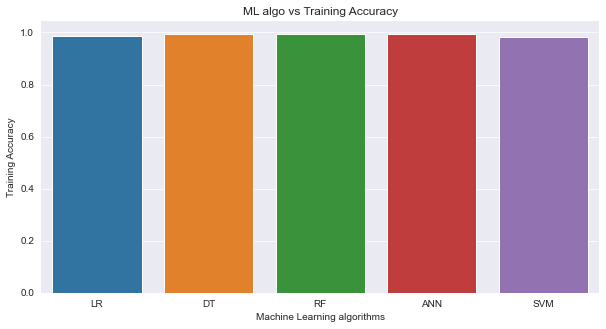

In [82]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5)) 
sns.set_style('darkgrid')

x = ['LR', 'DT', 'RF', 'ANN', 'SVM']
y = [lr_acc_train,dt_acc_train,rf_acc_train,ann_acc_train,svm_acc_train]

plt.title('ML algo vs Training Accuracy')
sns.despine(left=True);
ax = sns.barplot( x,y)
ax.set(xlabel='Machine Learning algorithms',ylabel='Training Accuracy')
plt.show()

(ii)Testing Accuracy

In [83]:
   
x = PrettyTable()

x.field_names = ['Testing','LR', 'DT', 'RF', 'ANN', 'SVM']
x.add_row(['Accuracy',lr_acc_test,dt_acc_test,rf_acc_test,ann_acc_test,svm_acc_test])
print(x)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Testing  |         LR         |         DT         |         RF         |        ANN         |        SVM         |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy | 0.9874701420609312 | 0.9943566749081563 | 0.9943427062816913 | 0.9942588945229016 | 0.9827627149422398 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


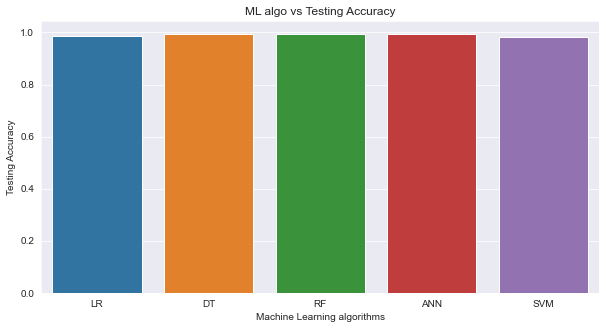

In [84]:
fig = plt.figure(figsize = (10, 5)) 
sns.set_style('darkgrid')

x = ['LR', 'DT', 'RF', 'ANN', 'SVM']
y = [lr_acc_test,dt_acc_test,rf_acc_test,ann_acc_test,svm_acc_test]
sns.despine(left=True);
ax = sns.barplot(x,y)
plt.title('ML algo vs Testing Accuracy')
ax.set(xlabel='Machine Learning algorithms',ylabel='Testing Accuracy')
plt.show()

2.Comparing the Time taken

(i)Training Time

In [86]:
x = PrettyTable()

x.field_names = ['Training','LR', 'DT', 'RF', 'ANN', 'SVM']
x.add_row(['Time taken (s)',time_l_lr,time_l_dt,time_l_rf,time_l_ann,time_l_svm])
print(x)

+----------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|    Training    |         LR         |         DT         |         RF         |        ANN        |        SVM         |
+----------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| Time taken (s) | 150.03465795516968 | 12.217243671417236 | 31.969480276107788 | 97.87621355056763 | 346.04721236228943 |
+----------------+--------------------+--------------------+--------------------+-------------------+--------------------+


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


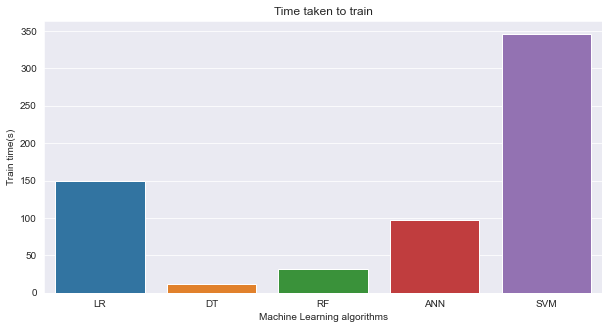

In [87]:
fig = plt.figure(figsize = (10, 5)) 
sns.set_style('darkgrid')

x = ['LR', 'DT', 'RF', 'ANN', 'SVM']
y = [time_l_lr,time_l_dt,time_l_rf,time_l_ann,time_l_svm]
sns.despine(left=True);
ax = sns.barplot( x, y)
plt.title('Time taken to train')
ax.set(xlabel='Machine Learning algorithms',ylabel='Train time(s)')
plt.show()

(ii)Testing Time

In [88]:
x = PrettyTable()

x.field_names = ['Testing','LR', 'DT', 'RF', 'ANN', 'SVM']
x.add_row(['Time taken (s)',time_fit_lr,time_fit_dt,time_fit_rf,time_fit_ann,time_fit_svm])
print(x)

+----------------+-------------------+-------------------+-------------------+--------------------+--------------------+
|    Testing     |         LR        |         DT        |         RF        |        ANN         |        SVM         |
+----------------+-------------------+-------------------+-------------------+--------------------+--------------------+
| Time taken (s) | 38.49999380111694 | 2.122478485107422 | 5.730687141418457 | 29.778282165527344 | 103.49215841293335 |
+----------------+-------------------+-------------------+-------------------+--------------------+--------------------+


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


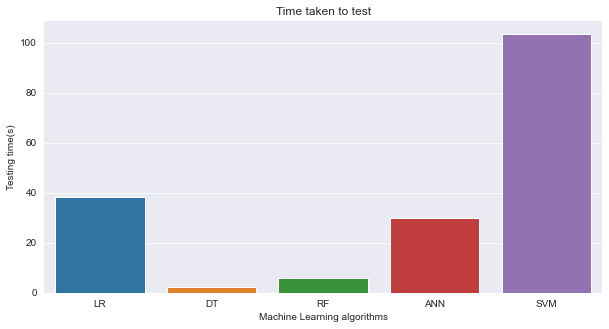

In [89]:
fig = plt.figure(figsize = (10, 5)) 
sns.set_style('darkgrid')

x = ['LR', 'DT', 'RF', 'ANN', 'SVM']
y = [time_fit_lr,time_fit_dt,time_fit_rf,time_fit_ann,time_fit_svm]
plt.title('Time taken to test')
sns.despine(left=True);
ax = sns.barplot(x,y)
ax.set(xlabel='Machine Learning algorithms',ylabel='Testing time(s)')
plt.show()

 3.Ranking ML algorithms

In [90]:
def Sort(sub_li): 
    return(sorted(sub_li, key = lambda x: x[1], reverse = True))     

In [91]:
def Sorti(sub_li): 
    return(sorted(sub_li, key = lambda x: x[1]))   

In [92]:
l=list([['LR',lr_acc_train],['DT',dt_acc_train],['RF',rf_acc_train],['ANN',ann_acc_train],['SVM',svm_acc_train]])

In [93]:

l = Sort(l)

x = PrettyTable()
x.field_names = ['Rank','ML algorithm']
for i in range(len(l)):
    x.add_row([i+1 ,l[i][0]])
print('Based on training accuracy most preferred algorithm (arranged from most to least accurate):')
print(x)

Based on training accuracy most preferred algorithm (arranged from most to least accurate):
+------+--------------+
| Rank | ML algorithm |
+------+--------------+
|  1   |      DT      |
|  2   |      RF      |
|  3   |     ANN      |
|  4   |      LR      |
|  5   |     SVM      |
+------+--------------+


In [94]:
l=list([['LR',lr_acc_test],['DT',dt_acc_test],['RF',rf_acc_test],['ANN',ann_acc_test],['SVM',svm_acc_test]])

In [95]:
  
l = Sort(l)

x = PrettyTable()
x.field_names = ['Rank','ML algorithm']
for i in range(len(l)):
    x.add_row([i+1 ,l[i][0]])
print('Based on testing accuracy most preferred algorithm  (arranged from most to least accurate) :')
print(x)

Based on testing accuracy most preferred algorithm  (arranged from most to least accurate) :
+------+--------------+
| Rank | ML algorithm |
+------+--------------+
|  1   |      DT      |
|  2   |      RF      |
|  3   |     ANN      |
|  4   |      LR      |
|  5   |     SVM      |
+------+--------------+


In [96]:
l=list([['LR',time_l_lr],['DT',time_l_dt],['RF',time_l_rf],['ANN',time_l_ann],['SVM',time_l_svm]])

In [97]:
l = Sorti(l)
x = PrettyTable()
x.field_names = ['Rank','ML algorithm']
for i in range(len(l)):
    x.add_row([i+1 ,l[i][0]])
print('Based on training time most preferred algorithm  (arranged from least to most time taken) :')
print(x)

Based on training time most preferred algorithm  (arranged from least to most time taken) :
+------+--------------+
| Rank | ML algorithm |
+------+--------------+
|  1   |      DT      |
|  2   |      RF      |
|  3   |     ANN      |
|  4   |      LR      |
|  5   |     SVM      |
+------+--------------+


In [98]:
l=list([['LR',time_fit_lr],['DT',time_fit_dt],['RF',time_fit_rf],['ANN',time_fit_ann],['SVM',time_fit_svm]])

In [99]:
l = Sorti(l)
x = PrettyTable()
x.field_names = ['Rank','ML algorithm']
for i in range(len(l)):
    x.add_row([i+1 ,l[i][0]])
print('Based on testing time most preferred algorithm  (arranged from least to most time taken):')
print(x)

Based on testing time most preferred algorithm  (arranged from least to most time taken):
+------+--------------+
| Rank | ML algorithm |
+------+--------------+
|  1   |      DT      |
|  2   |      RF      |
|  3   |     ANN      |
|  4   |      LR      |
|  5   |     SVM      |
+------+--------------+


In [101]:
print('** CONCLUSION **')
print("Thus it can be concluded that one should use DT technique on these kind of datasets for solving cyberattacks on IoT network because DT predicted D.P, M.C, M.O, SC, SP, W.S attacks accurately compared to other approaches")

** CONCLUSION **
Thus it can be concluded that one should use DT technique on these kind of datasets for solving cyberattacks on IoT network because DT predicted D.P, M.C, M.O, SC, SP, W.S attacks accurately compared to other approaches
